In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Datos
points = {
    "A": (2, 10),
    "B": (2, 5),
    "C": (8, 4),
    "D": (5, 8),
    "E": (7, 5),
    "F": (6, 4),
    "G": (1, 2),
    "H": (4, 9)
}

In [15]:
# Función para calcular la distancia euclidiana
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [16]:
# DBScan
def dbscan(points, eps, min_points):
    point_names = list(points.keys())
    point_coords = list(points.values())
    n = len(points)
    visited = set()
    clusters = []
    noise = set()
    
    def region_query(p_idx):
        neighbors = []
        for i in range(n):
            if euclidean_distance(point_coords[p_idx], point_coords[i]) <= eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(p_idx, neighbors, cluster):
        cluster.append(p_idx)
        visited.add(p_idx)
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if neighbor_idx not in visited:
                visited.add(neighbor_idx)
                new_neighbors = region_query(neighbor_idx)
                if len(new_neighbors) >= min_points:
                    neighbors += new_neighbors
            if neighbor_idx not in sum(clusters, []):
                cluster.append(neighbor_idx)
            i += 1

    for i in range(n):
        if i not in visited:
            visited.add(i)
            neighbors = region_query(i)
            if len(neighbors) < min_points:
                noise.add(i)
            else:
                cluster = []
                expand_cluster(i, neighbors, cluster)
                clusters.append(cluster)
                
    # Convertir índices a nombres de puntos
    named_clusters = [[point_names[idx] for idx in cluster] for cluster in clusters]
    named_noise = [point_names[idx] for idx in noise]
    return named_clusters, named_noise

In [17]:
# Dibujar los clusters
def plot_dbscan(points, clusters, noise, eps_str):
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    
    # Ajustar límites dinámicamente, asegurando al menos 10 puntos en cada eje y un margen extra
    x_coords, y_coords = zip(*points.values())
    x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
    y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
    if x_max - x_min < 10:
        x_max = x_min + 10
    if y_max - y_min < 10:
        y_max = y_min + 10
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Dibujar los puntos de los clusters
    for cluster_idx, cluster in enumerate(clusters):
        cluster_points = np.array([points[name] for name in cluster])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_idx+1}", color=colors[cluster_idx % len(colors)])
        for name, coords in zip(cluster, cluster_points):
            plt.text(coords[0], coords[1], name, fontsize=10, color='black', ha='center', va='center')
    
    # Dibujar los puntos de ruido
    if noise:
        noise_points = np.array([points[name] for name in noise])
        plt.scatter(noise_points[:, 0], noise_points[:, 1], color='red', label="Noise")
        for name, coords in zip(noise, noise_points):
            plt.text(coords[0], coords[1], name, fontsize=10, color='black', ha='center', va='center')
    
    plt.title(f"DBScan Clusters (eps={eps_str})")
    plt.legend()
    plt.show()

Clusters encontrados con eps=2: [['C', 'C', 'E', 'F', 'C', 'E', 'F', 'C', 'E', 'F'], ['D', 'D', 'H', 'D', 'H']]
Ruido con eps=2: ['A', 'B', 'G']


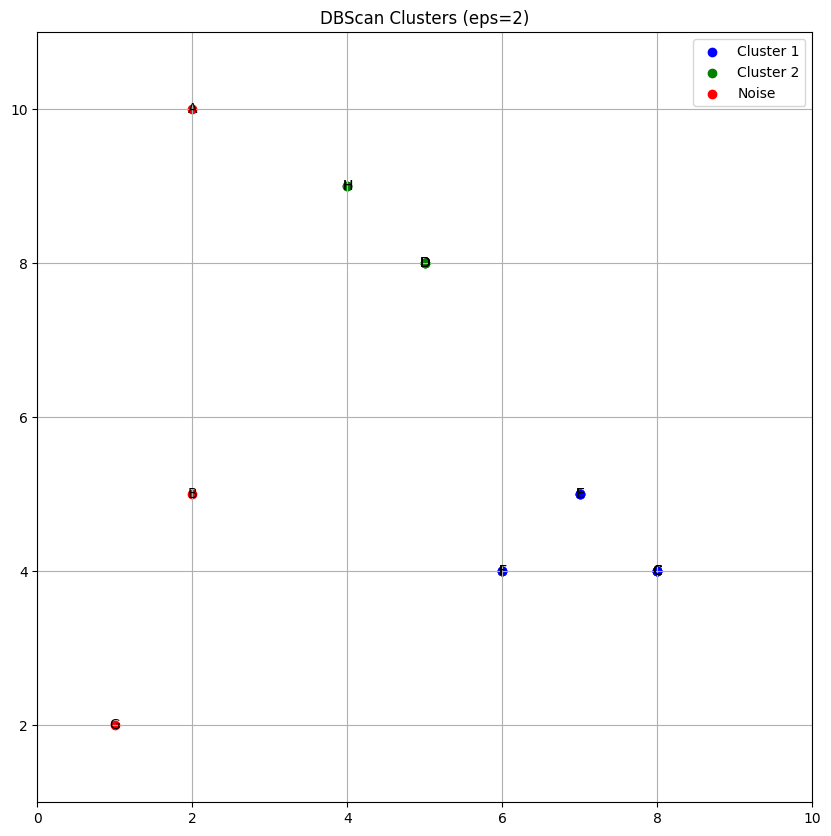

Clusters encontrados con eps=3.1622776601683795: [['A', 'A', 'H', 'A', 'D', 'H', 'D', 'H'], ['B', 'B', 'G', 'B', 'G'], ['C', 'C', 'E', 'F', 'C', 'E', 'F', 'C', 'E', 'F']]
Ruido con eps=3.1622776601683795: []


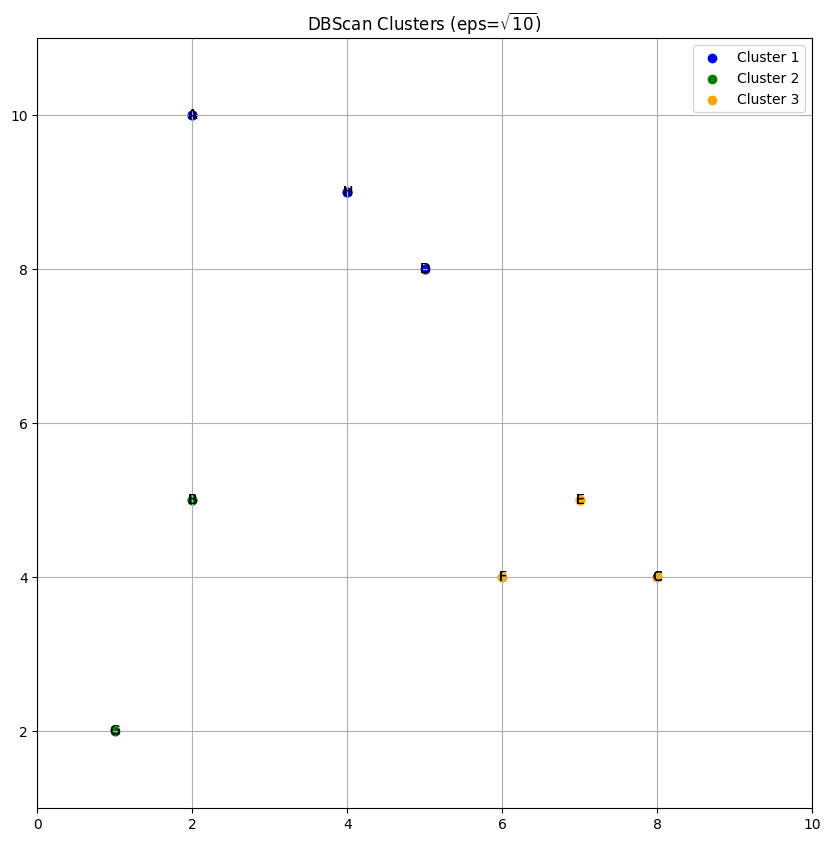

In [18]:
# Parámetros iniciales
eps = 2
min_points = 2

# Ejecutar DBScan con eps=2
clusters, noise = dbscan(points, eps, min_points)
print(f"Clusters encontrados con eps={eps}: {clusters}")
print(f"Ruido con eps={eps}: {noise}")
plot_dbscan(points, clusters, noise, "2")

# Ejecutar DBScan con eps=sqrt(10)
eps = np.sqrt(10)
clusters, noise = dbscan(points, eps, min_points)
print(f"Clusters encontrados con eps={eps}: {clusters}")
print(f"Ruido con eps={eps}: {noise}")
plot_dbscan(points, clusters, noise, r"$\sqrt{10}$")